In [33]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import pprint
from sklearn.neighbors import KNeighborsClassifier
from sklearn import naive_bayes

In [4]:
data = pd.read_csv("white_wine.csv", encoding="UTF-8")
data.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,0.56,12.0,5
1,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,0.53,9.7,5
2,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,0.63,10.8,5
3,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.0002,2.98,0.67,9.7,5
4,6.2,0.66,0.48,1.20,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
5,6.5,0.31,0.14,7.50,0.044,34.0,133.0,0.9955,3.22,0.50,9.5,5
6,6.2,0.66,0.48,1.20,0.029,29.0,75.0,0.9892,3.33,0.39,12.8,8
7,6.8,0.26,0.42,1.70,0.049,41.0,122.0,0.9930,3.47,0.48,10.5,8
8,7.6,0.67,0.14,1.50,0.074,25.0,168.0,0.9937,3.05,0.51,9.3,5
9,5.8,0.27,0.20,14.95,0.044,22.0,179.0,0.9962,3.37,0.37,10.2,5


Датасет содержит информацию о белом португальском вине "Vinho Verde". Здесь ответом служит качество вина (от 0 до 10), а в качестве признаков идут столбцы с информацией:

1 - fixed acidity(фиксированная кислотность)

2 - volatile acidity(летучая кислотность)

3 - citric acid(лимонная кислота)

4 - residual sugar(остаточный сахар)

5 - chlorides(хлориды)

6 - free sulfur dioxide(свободный диоксид серы)

7 - total sulfur dioxide(общий диоксид серы)

8 - density(плотность)

9 - pH

10 - sulphates(сульфаты)

11 - alcohol(алкоголь)                                                

Все эти признаки вещественнозначные и являются входными данными. Выходными данными является качество quality.

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000,3696.000000
mean,6.790652,0.285131,0.326591,6.528896,0.045605,35.184253,136.448187,0.993908,3.176066,0.487394,10.569042,5.783820
std,0.828973,0.104793,0.118135,5.098094,0.022320,17.577676,42.759170,0.003063,0.146043,0.112821,1.277919,0.978839
min,3.800000,0.085000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.790000,0.220000,8.000000,3.000000
25%,6.300000,0.220000,0.260000,1.800000,0.035000,23.000000,107.000000,0.991517,3.080000,0.410000,9.400000,5.000000
50%,6.700000,0.270000,0.310000,5.450000,0.043000,34.000000,132.000000,0.993655,3.170000,0.470000,10.400000,6.000000
75%,7.300000,0.330000,0.380000,10.100000,0.050000,46.000000,166.000000,0.996040,3.260000,0.540000,11.500000,6.000000
max,11.800000,1.100000,1.230000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [6]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.016517,0.276569,0.083568,0.035238,-0.076566,0.084031,0.264131,-0.440084,-0.019805,-0.137247,-0.154731
volatile acidity,0.016517,1.000000,-0.129509,0.039265,0.090719,-0.096342,0.101160,0.036078,0.016984,-0.016839,0.061980,-0.193831
citric acid,0.276569,-0.129509,1.000000,0.109221,0.109270,0.101365,0.135739,0.159049,-0.185599,0.077983,-0.090914,-0.027743
residual sugar,0.083568,0.039265,0.109221,1.000000,0.107641,0.271873,0.391648,0.838399,-0.189790,-0.009646,-0.452785,-0.087788
chlorides,0.035238,0.090719,0.109270,0.107641,1.000000,0.096942,0.222872,0.278272,-0.100130,0.031703,-0.370540,-0.234349
free sulfur dioxide,-0.076566,-0.096342,0.101365,0.271873,0.096942,1.000000,0.611174,0.261784,0.010845,0.069869,-0.228568,0.015237
total sulfur dioxide,0.084031,0.101160,0.135739,0.391648,0.222872,0.611174,1.000000,0.525935,0.016396,0.135587,-0.453177,-0.203295
density,0.264131,0.036078,0.159049,0.838399,0.278272,0.261784,0.525935,1.000000,-0.110473,0.072342,-0.787217,-0.348578
pH,-0.440084,0.016984,-0.185599,-0.189790,-0.100130,0.010845,0.016396,-0.110473,1.000000,0.129067,0.142834,0.074775
sulphates,-0.019805,-0.016839,0.077983,-0.009646,0.031703,0.069869,0.135587,0.072342,0.129067,1.000000,-0.006561,0.046583


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f375d9c15b0>,
      dtype=object)

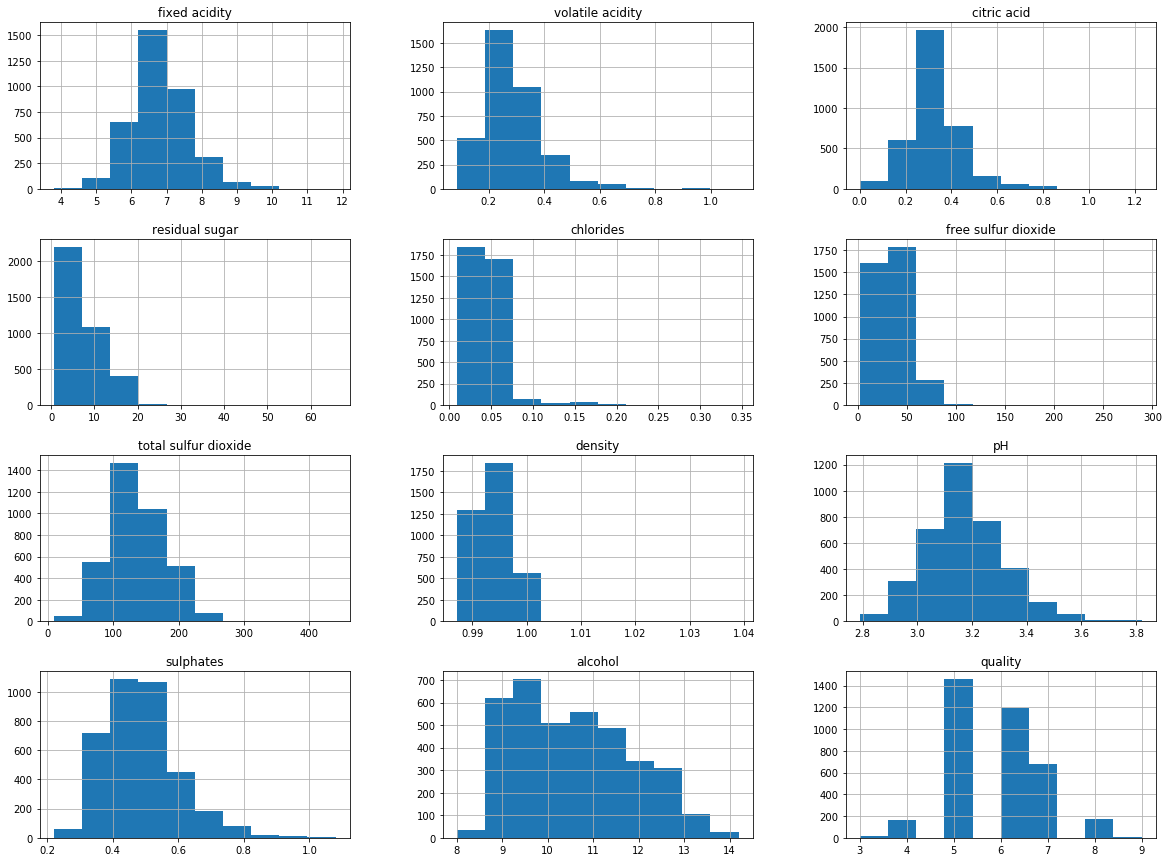

In [9]:
data.hist(figsize=(20, 15))

In [10]:
design_matrix, target = data.drop(columns=['quality']).to_numpy(), np.array(data['quality'])

In [11]:
design_matrix

array([[ 8.1 ,  0.27,  0.41, ...,  2.99,  0.56, 12.  ],
       [ 8.6 ,  0.23,  0.4 , ...,  3.14,  0.53,  9.7 ],
       [ 7.9 ,  0.18,  0.37, ...,  3.18,  0.63, 10.8 ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
       [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
       [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]])

In [12]:
target

array([5, 5, 5, ..., 6, 7, 6])

In [13]:
cnt_sign = design_matrix.shape[1]
max_values = np.zeros(cnt_sign)
for i in range(cnt_sign):
    tmp_max = design_matrix[:, i].max()
    max_values[i] = tmp_max
    design_matrix[:, i] /= tmp_max

In [14]:
print(data[data['quality'] >= 6].shape[0] / data['quality'].shape[0] * 100)
print(data[data['quality'] < 6].shape[0] / data['quality'].shape[0] * 100)

55.62770562770562
44.37229437229438


Два класса. Первый класс - качество больше либо равно 6, второй - меньше 6.

In [15]:
for i in range(0, len(target)):
    if target[i] >= 6:
        target[i] = 1
    else:
        target[i] = 0
print(target)

[0 0 0 ... 1 1 1]


In [16]:
def euclidean(v1, v2):
    return sum([(x - y)**2 for x, y in zip(v1, v2)]) ** 0.5
print(target)

[0 0 0 ... 1 1 1]


Разобьем на обучающую и на тестовую выборки.

In [25]:
features_train, features_test, target_train, target_test = train_test_split(design_matrix, target, test_size=0.2, random_state=24)

In [18]:
class KNNClassificator:

    def __init__(self, design_matrix, target):
        self.design_matrix = design_matrix
        self.target = target

    def predict(self, obj_vector, k, metric):
        nghs = np.zeros((self.design_matrix.shape[0], 2))
        for i in range(self.design_matrix.shape[0]):
            nghs[i] = (metric(obj_vector, self.design_matrix[i]), self.target[i])
        sorted_k_nghbs = sorted(nghs, key=lambda x: x[0])[:k]
        cnt_0 = 0
        cnt_1 = 0
        for x, y in sorted_k_nghbs:
            if y == 0:
                cnt_0 += 1
            elif y == 1:
                cnt_1 +=1
        return 1 if cnt_1 > cnt_0 else 0
        
          
    def score(self, features, target, k, metric):
        right_predict_number = 0
        for i in range(features.shape[0]):
            if self.predict(features[i], k, metric) == target[i]:
                right_predict_number += 1
        return right_predict_number / target.shape[0]

In [19]:
knn = KNNClassificator(features_train, target_train)
print('KNN implementation accuracy on the train set: ', knn.score(features_train, target_train, 7, euclidean))
print('KNN implementation accuracy on the test set: ', knn.score(features_test, target_test, 7, euclidean))


KNN implementation accuracy on the train set:  0.8572395128552097
KNN implementation accuracy on the test set:  0.7972972972972973


In [20]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(features_train, target_train)
knn.score(features_train, target_train), knn.score(features_test, target_test)
print('sklearn implementation accuracy on the train set: {}'.format(knn.score(features_train, target_train)))
print('sklearn implementation accuracy on the test set: {}'.format(knn.score(features_test, target_test)))



sklearn implementation accuracy on the train set: 0.8572395128552097
sklearn implementation accuracy on the test set: 0.7972972972972973


In [21]:
class NormalDistribution:
    def __init__(self, mean, std):
        self.mean = mean
        self.std = std
        
    def probability_d(self, value):
        return 1 / (self.std * (2 * np.pi) ** 0.5 * np.exp((value - self.mean) ** 2 / (2 * self.std ** 2)))

In [28]:
class NaiveBayes:
    def __init__(self, design_matrix, target):
        self.label_prob = {
            0: len(target[target == 0] / len(target)),
            1: len(target[target == 1] / len(target))
        }
        self.cond_prob = {}
        for v in (0, 1):
            prob = []
            for column in range(design_matrix.shape[1]):
                feature = design_matrix[target == v, column]
                prob.append(NormalDistribution(feature.mean(axis=0), feature.std(axis=0)))
            self.cond_prob[v] = prob
    
    def predict(self, array):
        label_prob = {}
        for v in {0, 1}:
            cond_feature_prob = 0
            for i in range(array.shape[0]):
                cond_feature_prob += np.log(self.cond_prob[v][i].probability_d(array[i]))
            label_prob[v] = cond_feature_prob + self.label_prob[v]
        return 1 if label_prob[1] < label_prob[0] else 0
    
    def score(self, features, target):
        rigth_predict_number = 0
        for i in range(features.shape[0]):
            if self.predict(features[i]) == target[i]:
                rigth_predict_number += 1
                
        return rigth_predict_number / target.shape[0]

In [31]:
nb = NaiveBayes(features_train, target_train)
print(nb.score(features_train, target_train))
print(nb.score(features_test, target_test))

0.4472259810554804
0.4297297297297297


In [34]:
sklearn_nb = naive_bayes.GaussianNB()
sklearn_nb.fit(features_train, target_train)
print('sklearn implementation accuracy on the train set: {}'.format(sklearn_nb.score(features_train, target_train)))
print('sklearn implementation accuracy on the test set: {}'.format(sklearn_nb.score(features_test, target_test)))



sklearn implementation accuracy on the train set: 0.736468200270636
sklearn implementation accuracy on the test set: 0.75
